# INTRODUCCION DEL TRABAJO

## Presentacion de Power Point
> https://github.com/Havilongo/Proyecto-CoderHouse/blob/main/Presentacion.pdf

### Prediccion de resultado de la Copa America 2024
#### Introduccion: 
La Copa América es uno de los torneos de fútbol más prestigiosos y antiguos del mundo, donde las selecciones nacionales de América del Sur, y esta vez las América Central y América del Norte, compiten para determinar el campeón continental. La edición de 2024 promete ser especialmente competitiva y emocionante, con equipos históricamente fuertes y variados luchando por el título.

En el contexto de la creciente importancia del análisis de datos y la inteligencia artificial en el deporte, este trabajo se centra en la obtencion de datos usando Web Scrapping y en la aplicación de algoritmos de clasificación para predecir los resultados de la Copa América 2024.

#### Objetivo del Estudio
El objetivo principal de este trabajo es utilizar diversos algoritmos de clasificación para predecir el resultado de la Copa América 2024. Esto implica la recopilación y preprocesamiento de datos históricos y actuales, la selección y entrenamiento de modelos de machine learning, y la evaluación de su desempeño para determinar la precisión y la viabilidad de las predicciones.

En resumen, este estudio no solo busca predecir los resultados de un evento deportivo significativo, sino también resaltar cómo la integración de machine learning y análisis de datos puede ofrecer nuevas perspectivas y aplicaciones en el mundo del deporte.

### Data Scraping
> https://github.com/Havilongo/Proyecto-CoderHouse/blob/main/Scrape%20de%20equipos%20y%20partidos.ipynb

Importo librerias

In [659]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [893]:
df = pd.read_csv('https://raw.githubusercontent.com/Havilongo/Proyecto-CoderHouse/main/historial.csv', index_col=0)
df

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,referee,match_report,notes,sh,sot,dist,pk,pkatt,season,team
0,2024-03-22,20:00,Friendlies (M),Friendlies (M),Fri,Neutral,W,3,0,sv El Salvador,...,Víctor Rivas,Match Report,NaN,NaN,NaN,NaN,0,0,2024,Argentina
1,2024-03-26,19:50,Friendlies (M),Friendlies (M),Tue,Neutral,W,3,1,cr Costa Rica,...,Joe Dickerson,Match Report,NaN,NaN,NaN,NaN,0,0,2024,Argentina
2,2024-06-09,18:00,Friendlies (M),Friendlies (M),Sun,Neutral,W,1,0,ec Ecuador,...,Drew Fischer,Match Report,NaN,NaN,NaN,NaN,0,0,2024,Argentina
3,2024-06-14,20:00,Friendlies (M),Friendlies (M),Fri,Neutral,W,4,1,gt Guatemala,...,Joe Dickerson,Match Report,NaN,NaN,NaN,NaN,1,1,2024,Argentina
4,2024-03-22,20:00,Friendlies (M),Friendlies (M),Fri,Neutral,W,3,0,sv El Salvador,...,Víctor Rivas,Match Report,NaN,NaN,NaN,NaN,0,0,2024,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,2023-07-08,20:30,Gold Cup,Quarter-finals,Sat,Neutral,L,0,2,mx Mexico,...,Said Martínez,Match Report,NaN,9.0,1.0,NaN,0,0,2023,Costa-Rica
517,2023-09-08,20:00,Friendlies (M),Friendlies (M),Fri,Neutral,W,3,1,sa Saudi Arabia,...,John Brooks,Match Report,NaN,NaN,NaN,NaN,0,0,2023,Costa-Rica
518,2023-09-12,17:00,Friendlies (M),Friendlies (M),Tue,Neutral,L,1,4,ae UAE,...,Ante Čulina,Match Report,NaN,NaN,NaN,NaN,0,0,2023,Costa-Rica
519,2023-03-27,21:30,Friendlies (M),Friendlies (M),Mon,Away,L,2,3,cl Chile,...,Flavio Rodrigues de Souza,Match Report,NaN,NaN,NaN,NaN,0,0,2023,Paraguay


In [894]:
type(df)

pandas.core.frame.DataFrame

### Detalle de las columnas 

- Date = La fecha indicada es local al partido
- Time = La hora indicada es local al lugar del partido
- La hora está escrita en notación de 24 horas
- Tu hora local está en (·)
- Comp = Competición
- Competición
- El número junto a la competición indica en qué nivel de la pirámide de la liga del país se encuentra esta liga.
- Round = Ronda o fase de la competición
- Day = Dia de la semana
- Venue = Local/Visitante/Neutral
- Result = resultado del partido: ganado (W), perdido (L), empatado (D)
- GF = Goles a favor
- GA = Goles en contra
- Opponent = equipo rival contra el que jugo y un codigo de referencia -> separar tabla
- Poss = Posesión
- Attendance = cantidad de gente en la cancha
- Captain = jugador que fue capitan ese partido
- Formation = Número de jugadores en cada línea, desde defensores hasta delanteros, excluyendo al portero.
- Referee = arbitro del encuentro
- Match_report = conduce a una pagina que tiene un resumen del partido
- Notes = algo que valga la pena resaltar sobre el partido
- Sh = Total de disparos
- Sot = Disparos que fueron al arco
- Dist = Promedio de Distancia de Tiro
- Distancia promedio, en yardas, desde el arco de todos los tiros realizados, no incluye tiros desde el punto penal
- Pk = Penales
- Pkatt = Penales Intentados
- Season = Temporada
- Team = Equipo de la copa america

In [662]:
df.columns

Index(['date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'gf', 'ga',
       'opponent', 'poss', 'attendance', 'captain', 'formation', 'referee',
       'match_report', 'notes', 'sh', 'sot', 'dist', 'pk', 'pkatt', 'season',
       'team'],
      dtype='object')

## Distribuciones de variables

C:\Users\theja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\theja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\theja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\theja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

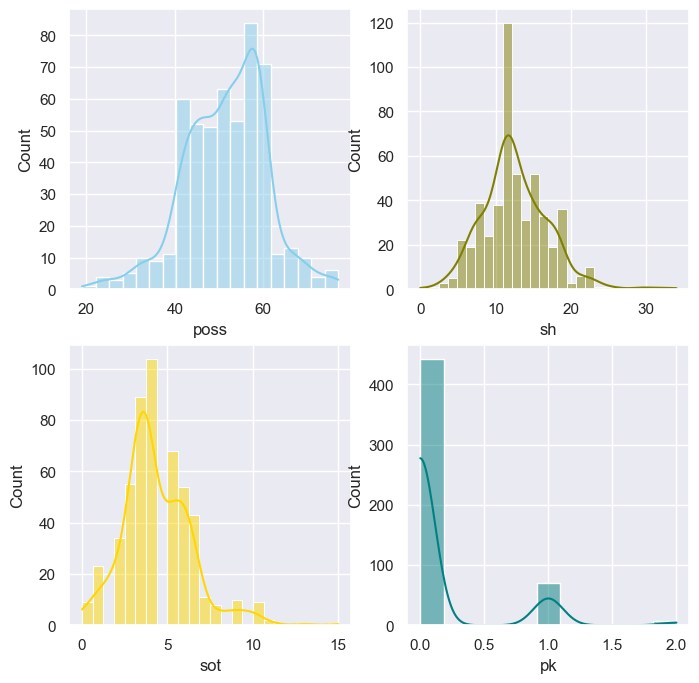

In [806]:
# Tipos de distribuciones de las variables

sns.set_theme(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(8, 8))


sns.histplot(data=df, x="poss", kde=True, label="Posesion (%)", color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="sh", kde=True, label="Tiros al arco", color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="sot", kde=True, label = 'Tiros entre los tres palos',color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="pk", kde=True, label = 'Tiros penal', color="teal", ax=axs[1, 1])


plt.show()

C:\Users\theja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\theja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


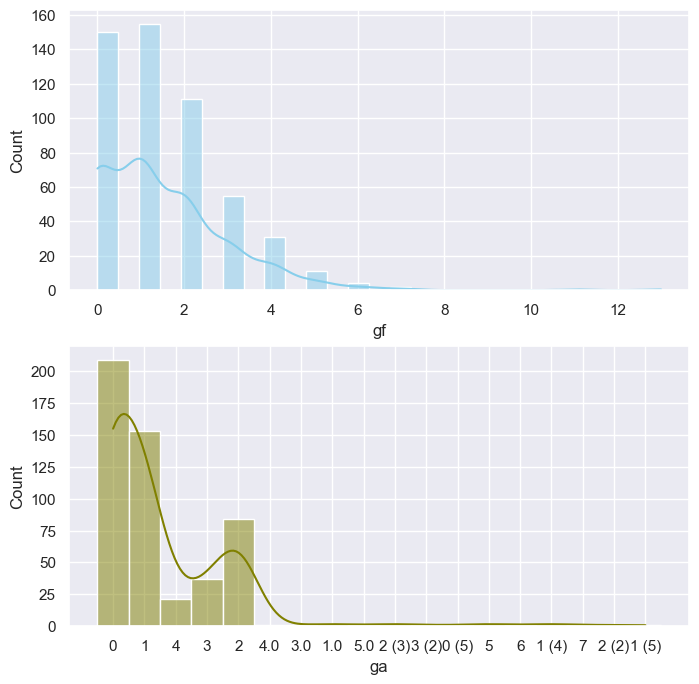

In [807]:
# Tipos de distribuciones de las variables

sns.set_theme(style="darkgrid")
fig, axs = plt.subplots(2,1, figsize=(8, 8))


sns.histplot(data=df, x="gf", kde=True, label="Goles a favor", color="skyblue", ax=axs[0])
sns.histplot(data=df, x="ga", kde=True, label="Goles en contra", color="olive", ax=axs[1])



plt.show()

Conclusios parcial: Tengo variables con distribuiones que parecen normal, otras infladas en 0 y otras que parecen poisson.

#### Chequeo por nulos

In [808]:


df.isnull().sum()/df.shape[0]

date            0.000000
time            0.000000
comp            0.000000
round           0.000000
day             0.000000
venue           0.000000
result          0.000000
gf              0.000000
ga              0.000000
opponent        0.000000
poss            0.000000
attendance      0.566219
captain         0.000000
formation       0.005758
referee         0.000000
match_report    0.000000
notes           0.976967
sh              0.000000
sot             0.000000
dist            0.942418
pk              0.000000
pkatt           0.000000
season          0.000000
team            0.000000
dtype: float64

> Tengo algunas variables con mas del 50 % de nulos.

## Tratamiento de nulos

### Posesion

In [666]:
# Posesion tiene 54% de nulos

print(df.poss.describe())

print(df.poss.mode())

count    239.000000
mean      51.000000
std       11.748055
min       19.000000
25%       44.000000
50%       51.000000
75%       58.000000
max       77.000000
Name: poss, dtype: float64
0    51.0
1    56.0
Name: poss, dtype: float64


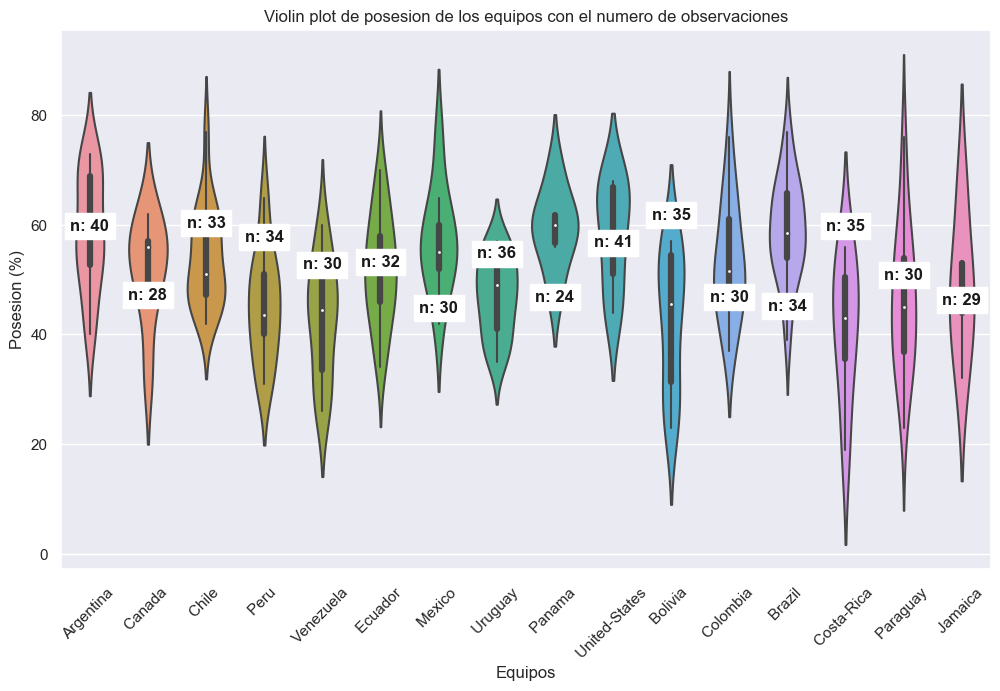

In [667]:
## Analisis Grafico

sns.set_theme(style="darkgrid")
fig, axs = plt.subplots(1, 1, figsize=(12, 7))


ax = sns.violinplot(x = 'team' ,y='poss', data=df)
plt.xticks(rotation=45)

# Calcular el numero de observaciones por groupo y mediana
medians = df.groupby(['team'])['poss'].median().values


nobs = df.groupby("team").size().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    plt.text(pos[tick], medians[tick] + 0.4, nobs[tick],verticalalignment = 'bottom', 
             horizontalalignment='center', size='medium', color='k',backgroundcolor = 'w', weight='semibold')

# agregar titulo y ejes
ax.set(xlabel='Equipos', ylabel='Posesion (%)',
       title='Violin plot de posesion de los equipos con el numero de observaciones')
# show the graph
plt.show()

In [668]:
# Imputar los datos faltantes con la media de cada equipo para no se influyan entre ellos

# Calcular la media por equipo
media_por_equipo = df.groupby('team')['poss'].mean()

media_por_equipo

team
Argentina         58.791667
Bolivia           42.555556
Brazil            59.090909
Canada            51.857143
Chile             53.944444
Colombia          53.166667
Costa-Rica        41.428571
Ecuador           51.857143
Jamaica           48.200000
Mexico            57.222222
Panama            59.333333
Paraguay          46.388889
Peru              45.277778
United-States     58.222222
Uruguay           46.904762
Venezuela         42.833333
Name: poss, dtype: float64

In [670]:
# Imputar los valores faltantes con la media por equipo
df['poss'] = df.apply(lambda row: row['poss'] if not pd.isna(row['poss']) else media_por_equipo[row['team']], axis=1)


### Tiros efectuados en el partido = 'sh'

In [671]:
df.isnull().sum()/df.shape[0]

date            0.000000
time            0.000000
comp            0.000000
round           0.000000
day             0.000000
venue           0.000000
result          0.000000
gf              0.000000
ga              0.000000
opponent        0.000000
poss            0.000000
attendance      0.566219
captain         0.000000
formation       0.005758
referee         0.000000
match_report    0.000000
notes           0.976967
sh              0.541267
sot             0.541267
dist            0.942418
pk              0.000000
pkatt           0.000000
season          0.000000
team            0.000000
dtype: float64

> Hay 54% de nulos

In [672]:
# Es muy variable segun los equipos 
df.groupby('team')['sh'].mean()

team
Argentina         13.541667
Bolivia           11.500000
Brazil            15.181818
Canada            11.285714
Chile             11.777778
Colombia          12.277778
Costa-Rica         7.428571
Ecuador           11.095238
Jamaica           12.600000
Mexico            18.333333
Panama            14.666667
Paraguay           9.222222
Peru               9.888889
United-States     16.666667
Uruguay           11.809524
Venezuela         11.333333
Name: sh, dtype: float64

> Hay bastante diferencia entre las medias de los equipos

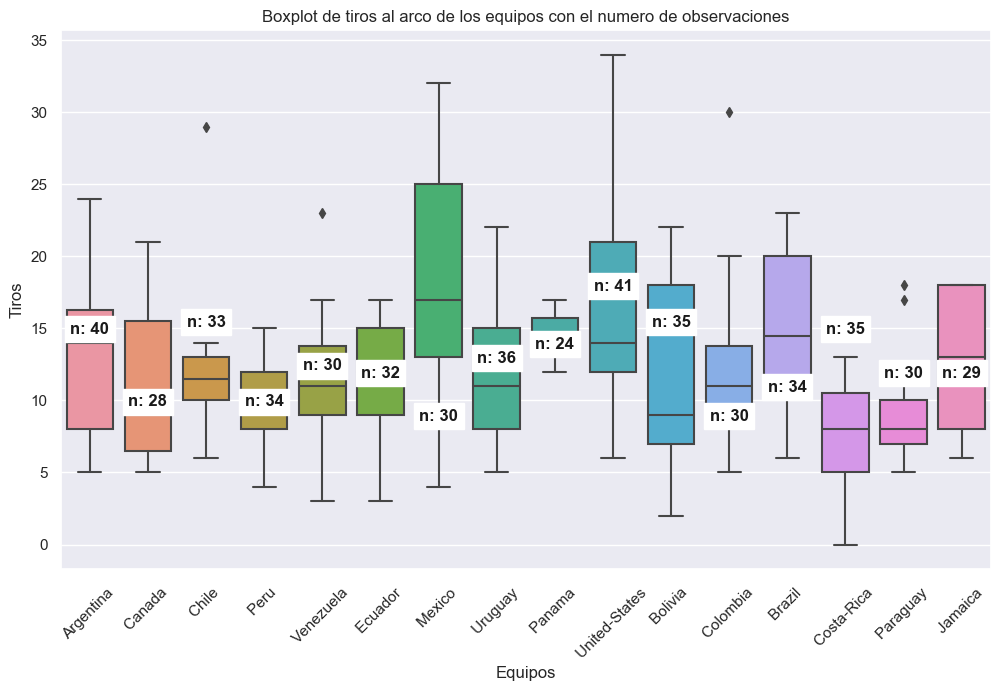

In [673]:
# Graficamos

sns.set_theme(style="darkgrid")
fig, axs = plt.subplots(1, 1, figsize=(12, 7))


ax = sns.boxplot(x = 'team' ,y='sh', data=df)
plt.xticks(rotation=45)

# Calcular el numero de observaciones por groupo y mediana
medians = df.groupby(['team'])['sh'].median().values


nobs = df.groupby("team").size().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    plt.text(pos[tick], medians[tick] + 0.4, nobs[tick],verticalalignment = 'bottom', 
             horizontalalignment='center', size='medium', color='k',backgroundcolor = 'w', weight='semibold')

# agregar titulo y ejes
ax.set(xlabel='Equipos', ylabel='Tiros',
       title='Boxplot de tiros al arco de los equipos con el numero de observaciones')
# show the graph
plt.show()

In [674]:
print(df.sh.describe())
print(df.sh.median())
print(df.sh.mode())

count    239.000000
mean      12.238494
std        5.611141
min        0.000000
25%        8.000000
50%       12.000000
75%       15.000000
max       34.000000
Name: sh, dtype: float64
12.0
0    10.0
Name: sh, dtype: float64


In [675]:
# Imputar los datos faltantes con la media de cada equipo para no se influyan entre ellos

# Calcular la media por equipo
tiros_por_equipo = df.groupby('team')['sh'].mean()

tiros_por_equipo

team
Argentina         13.541667
Bolivia           11.500000
Brazil            15.181818
Canada            11.285714
Chile             11.777778
Colombia          12.277778
Costa-Rica         7.428571
Ecuador           11.095238
Jamaica           12.600000
Mexico            18.333333
Panama            14.666667
Paraguay           9.222222
Peru               9.888889
United-States     16.666667
Uruguay           11.809524
Venezuela         11.333333
Name: sh, dtype: float64

In [676]:
# Imputar los valores faltantes con la media por equipo
df['sh'] = df.apply(lambda row: row['sh'] if not pd.isna(row['sh']) else tiros_por_equipo[row['team']], axis=1)


In [677]:
df.groupby('team')['sh'].mean()

team
Argentina         13.541667
Bolivia           11.500000
Brazil            15.181818
Canada            11.285714
Chile             11.777778
Colombia          12.277778
Costa-Rica         7.428571
Ecuador           11.095238
Jamaica           12.600000
Mexico            18.333333
Panama            14.666667
Paraguay           9.222222
Peru               9.888889
United-States     16.666667
Uruguay           11.809524
Venezuela         11.333333
Name: sh, dtype: float64

In [678]:
df.sh.isna().sum()

0

## Tiros que fueron al arco 'sot'

In [679]:
# Que informacion tiene cada equipo

df.groupby('team')['sot'].count()

team
Argentina         24
Bolivia           18
Brazil            22
Canada             7
Chile             18
Colombia          18
Costa-Rica         7
Ecuador           21
Jamaica            5
Mexico             9
Panama             6
Paraguay          18
Peru              18
United-States      9
Uruguay           21
Venezuela         18
Name: sot, dtype: int64

In [680]:
# Numero total de registros que hay de cada equipo
df.groupby('team')['team'].count()

team
Argentina         40
Bolivia           28
Brazil            33
Canada            34
Chile             30
Colombia          32
Costa-Rica        30
Ecuador           36
Jamaica           24
Mexico            41
Panama            35
Paraguay          30
Peru              34
United-States     35
Uruguay           30
Venezuela         29
Name: team, dtype: int64

In [681]:
# Porcentaje de datos sobre tiros a puerta que hay de cada equipo
(df.groupby('team')['sot'].count())/(df.groupby('team')['team'].count())*100

team
Argentina         60.000000
Bolivia           64.285714
Brazil            66.666667
Canada            20.588235
Chile             60.000000
Colombia          56.250000
Costa-Rica        23.333333
Ecuador           58.333333
Jamaica           20.833333
Mexico            21.951220
Panama            17.142857
Paraguay          60.000000
Peru              52.941176
United-States     25.714286
Uruguay           70.000000
Venezuela         62.068966
dtype: float64

In [682]:
print(df.sot.describe())
print('la mediana es: ',df.sot.median())
print('la moda es: ',df.sot.mode())

count    239.000000
mean       4.276151
std        2.709906
min        0.000000
25%        2.000000
50%        4.000000
75%        6.000000
max       15.000000
Name: sot, dtype: float64
la mediana es:  4.0
la moda es:  0    3.0
Name: sot, dtype: float64


C:\Users\theja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


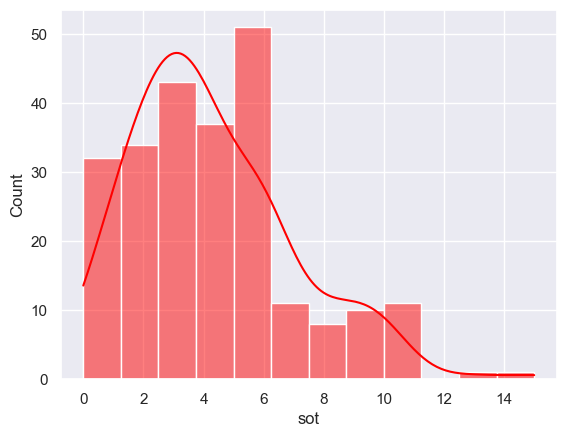

In [683]:
sns.set_theme(style="darkgrid")


sns.histplot(data=df, x="sot", kde=True, label="Posesion (%)", color="red")

# show the graph
plt.show()

Un poco sesgada a la derecha

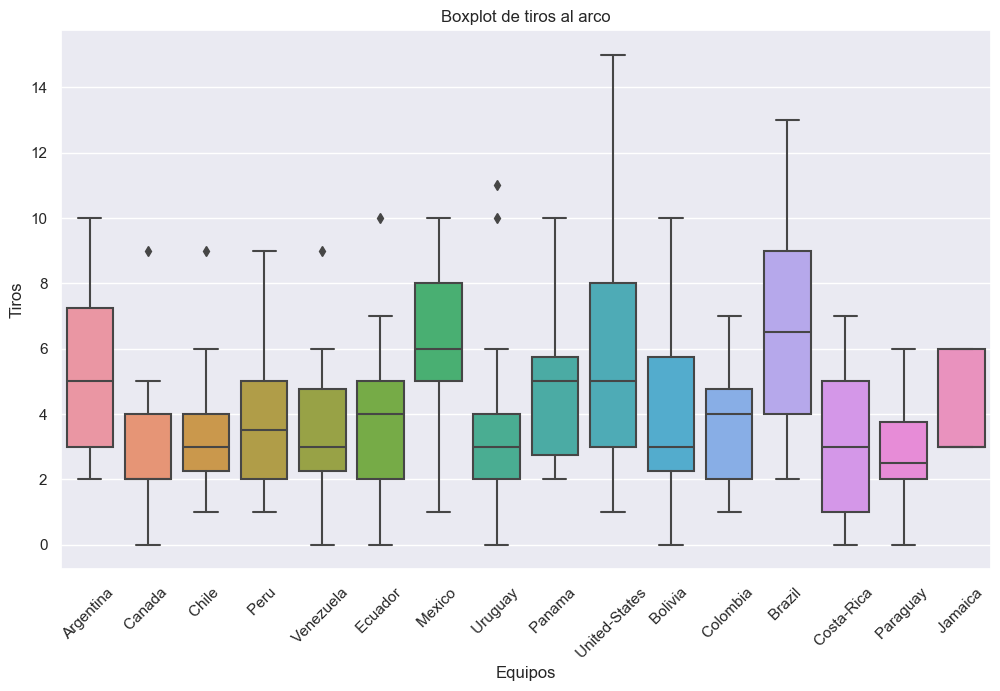

In [684]:
fig, axs = plt.subplots(1, 1, figsize=(12, 7))

# Grafico
ax = sns.boxplot(x = 'team' ,y='sot', data=df)
plt.xticks(rotation=45)
# agregar titulo y ejes
ax.set(xlabel='Equipos', ylabel='Tiros',
       title='Boxplot de tiros al arco')
# show the graph
plt.show()

In [685]:
# Imputar los datos faltantes con la media de cada equipo para no se influyan entre ellos

# Calcular la media por equipo
tiros_por_equipo = df.groupby('team')['sot'].mean()

tiros_por_equipo

team
Argentina         5.416667
Bolivia           3.888889
Brazil            6.636364
Canada            3.285714
Chile             3.444444
Colombia          3.888889
Costa-Rica        3.142857
Ecuador           3.857143
Jamaica           4.200000
Mexico            6.333333
Panama            5.000000
Paraguay          2.666667
Peru              3.722222
United-States     5.666667
Uruguay           3.857143
Venezuela         3.500000
Name: sot, dtype: float64

In [686]:
# Imputar los valores faltantes con la media por equipo
df['sot'] = df.apply(lambda row: row['sot'] if not pd.isna(row['sot']) else tiros_por_equipo[row['team']], axis=1)


In [687]:
df.groupby('team')['sot'].mean()

team
Argentina         5.416667
Bolivia           3.888889
Brazil            6.636364
Canada            3.285714
Chile             3.444444
Colombia          3.888889
Costa-Rica        3.142857
Ecuador           3.857143
Jamaica           4.200000
Mexico            6.333333
Panama            5.000000
Paraguay          2.666667
Peru              3.722222
United-States     5.666667
Uruguay           3.857143
Venezuela         3.500000
Name: sot, dtype: float64

C:\Users\theja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


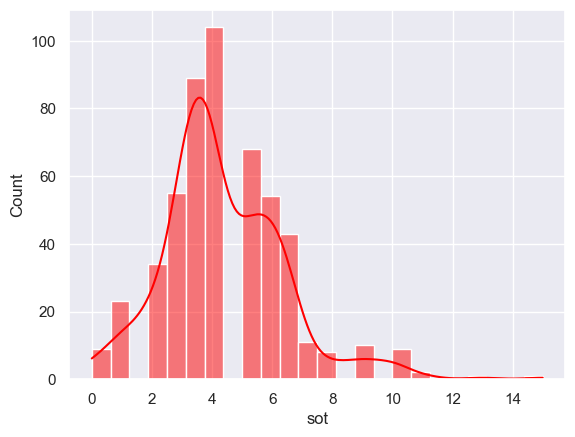

In [688]:
sns.set_theme(style="darkgrid")


sns.histplot(data=df, x="sot", kde=True, label="Posesion (%)", color="red")

# show the graph
plt.show()

Con la imputacion de datos se corrigio un poco 

## Goles a favor

In [689]:
df.gf.value_counts()

gf
1        150
0        147
2        107
3         54
4         31
5         11
6          4
0.0        2
1.0        2
7          2
13         1
2 (3)      1
1 (5)      1
2 (2)      1
1 (2)      1
3 (4)      1
0 (4)      1
11         1
2 (4)      1
2.0        1
1 (4)      1
Name: count, dtype: int64

In [690]:
df.loc[df['gf'] == '2 (3)']

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,referee,match_report,notes,sh,sot,dist,pk,pkatt,season,team
492,2023-07-09,19:30,Gold Cup,Quarter-finals,Sun,Neutral,D,2 (3),2 (2),ca Canada,...,Marco Ortíz,Match Report,United States won on penalty kicks following e...,21.0,8.0,NaN,0,0,2023,United-States


> Tengo esos valores que son strings que corresponden a los resultados por penales, voy a quedarme solo con los goles en los 120 minutos de partido

In [691]:
df['gf'] = df['gf'].str.split(' ').str[0]

In [692]:
# Cambio a numero todos los registros


df['gf'] = df.gf.astype(float)
df['gf'] = df.gf.astype(int)

In [693]:
df.gf.value_counts()

gf
1     155
0     150
2     111
3      55
4      31
5      11
6       4
7       2
11      1
13      1
Name: count, dtype: int64

C:\Users\theja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


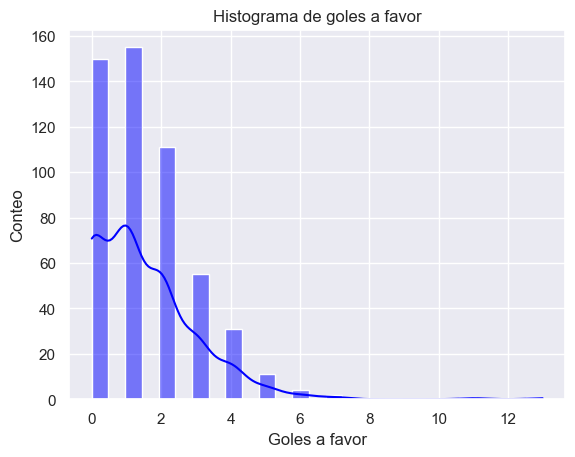

In [694]:
# Grafico de distribucion 

sns.set_theme(style="darkgrid")


ax = sns.histplot(data=df, x="gf", kde=True, color="blue")
ax.set(xlabel='Goles a favor', ylabel='Conteo',
       title='Histograma de goles a favor')

# show the graph
plt.show()

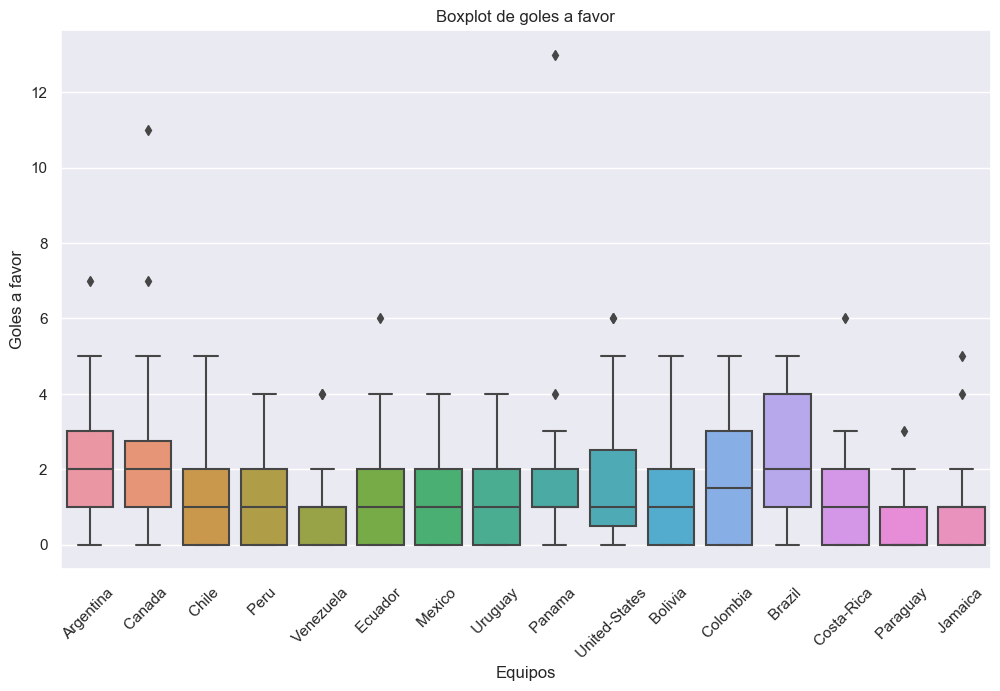

In [695]:

fig, axs = plt.subplots(1, 1, figsize=(12, 7))

# Grafico
ax = sns.boxplot(data=df, x='team', y='gf')
plt.xticks(rotation=45)

# agregar titulo y ejes
ax.set(xlabel='Equipos', ylabel='Goles a favor',
       title='Boxplot de goles a favor')
# show the graph
plt.show()


In [696]:
# Tratamiento de Outliers por el metodo del z-score

def limpio_outlier(dataframe,columna,metodo='z'):
  df_output=dataframe.copy()
  if metodo == 'iqr':
    q1=df_output[columna].quantile(0.25)
    q3=df_output[columna].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr

    upper_array = np.where(df_output[columna]>upper)[0]
    lower_array = np.where(df_output[columna]<lower)[0]

    # dropeamos estos outliers
    df_output.drop(index=upper_array,inplace=True)
    df_output.drop(index=lower_array,inplace=True)
  else:
    z_score=(df_output[columna]-df_output[columna].mean())/df_output[columna].std()
    outliers_age_sup=z_score[z_score > 3].index
    outliers_age_inf=z_score[z_score < -3].index
    df_output=df_output.drop(outliers_age_sup)
    df_output=df_output.drop(outliers_age_inf)
  return df_output.reset_index(drop=True)

In [697]:
df1 = limpio_outlier(df,'gf','z')


In [698]:
df1.shape

(517, 24)

In [699]:
df.shape

(521, 24)

In [700]:
# Se fueron 3 registros

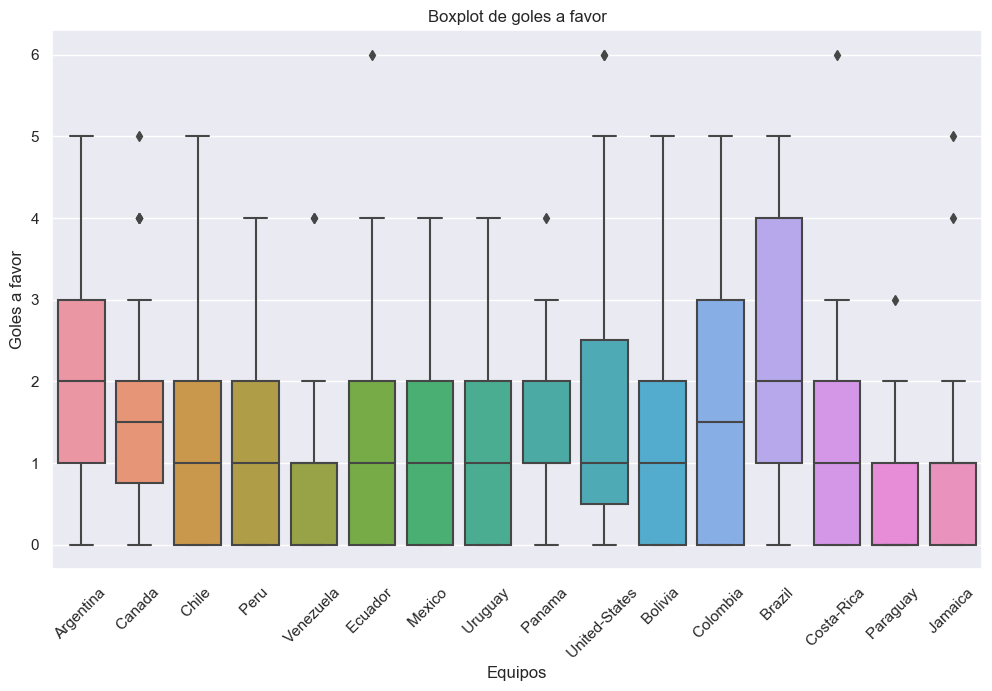

In [701]:

fig, axs = plt.subplots(1, 1, figsize=(12, 7))

# Grafico
ax = sns.boxplot(data=df1, x='team', y='gf')
plt.xticks(rotation=45)

# agregar titulo y ejes
ax.set(xlabel='Equipos', ylabel='Goles a favor',
       title='Boxplot de goles a favor')
# show the graph
plt.show()

## Goles en contra = 'ga'


In [702]:
df1.ga.value_counts()

ga
0        205
1        153
2         84
3         37
4         21
1 (4)      2
5          2
2 (3)      2
1.0        2
5.0        1
3 (2)      1
0 (5)      1
3.0        1
6          1
4.0        1
7          1
2 (2)      1
1 (5)      1
Name: count, dtype: int64

In [703]:
df1.loc[df1['ga'] == '2 (3)']

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,referee,match_report,notes,sh,sot,dist,pk,pkatt,season,team
70,2022-12-09,22:00,World Cup,Quarter-finals,Fri,Neutral,D,2,2 (3),nl Netherlands,...,Antonio Matéu,Match Report,Argentina won on penalty kicks following extra...,13.0,4.0,21.9,1,1,2022,Argentina
432,2023-07-09,19:30,Gold Cup,Quarter-finals,Sun,Neutral,D,2,2 (3),us United States,...,Marco Ortíz,Match Report,United States won on penalty kicks following e...,5.0,2.0,NaN,1,1,2023,Canada


In [704]:
# Regex sobre la columna con esos registros
df1['ga'] = df1['ga'].str.split(' ').str[0]

In [705]:
df1.ga.value_counts()

ga
0      206
1      156
2       87
3       38
4       21
1.0      2
5        2
4.0      1
3.0      1
5.0      1
6        1
7        1
Name: count, dtype: int64

In [706]:
# Cambio a numero todos los registros para sacar floats


df1['ga'] = df1.ga.astype(float)
df1['ga'] = df1.ga.astype(int)

In [707]:
df1.ga.value_counts()

ga
0    206
1    158
2     87
3     39
4     22
5      3
6      1
7      1
Name: count, dtype: int64

C:\Users\theja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


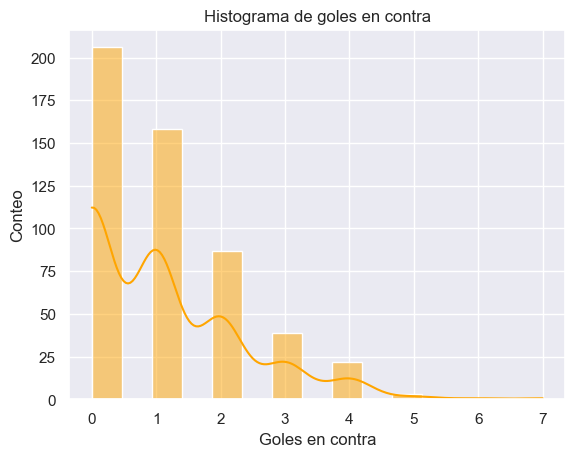

In [708]:
# Grafico de distribucion 

sns.set_theme(style="darkgrid")


ax = sns.histplot(data=df1, x="ga", kde=True, color="orange")
ax.set(xlabel='Goles en contra', ylabel='Conteo',
       title='Histograma de goles en contra')
# show the graph
plt.show()

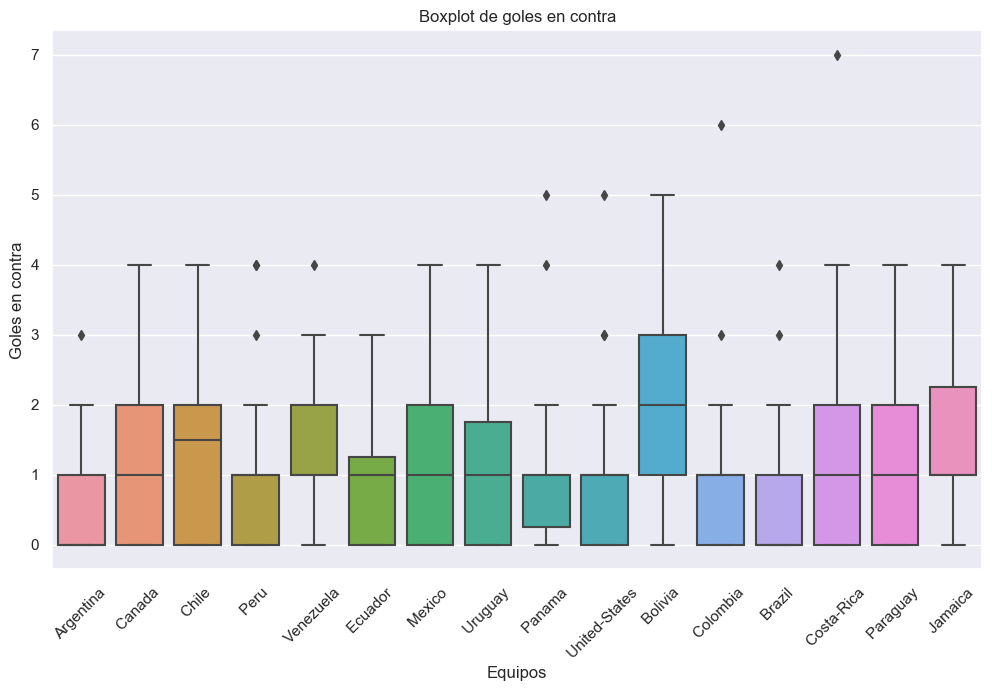

In [709]:
#Box plot


fig, axs = plt.subplots(1, 1, figsize=(12, 7))

# Grafico
ax = sns.boxplot(data=df1, x='team', y='ga')
plt.xticks(rotation=45)

# agregar titulo y ejes
ax.set(xlabel='Equipos', ylabel='Goles en contra',
       title='Boxplot de goles en contra')
# show the graph
plt.show()


In [710]:
# Chequeo por outliers

df1 = limpio_outlier(df1,'ga','z')


In [711]:
#Se elimino 1 registro por outlier
df1.shape

(512, 24)

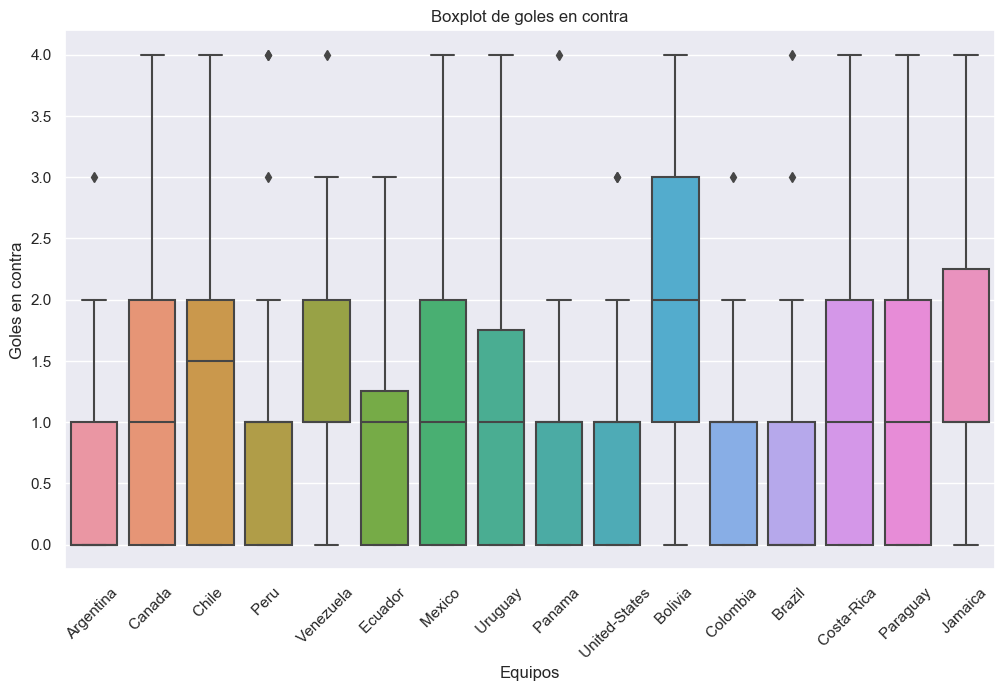

In [712]:
#Box plot


fig, axs = plt.subplots(1, 1, figsize=(12, 7))

# Grafico
ax = sns.boxplot(data=df1, x='team', y='ga')
plt.xticks(rotation=45)

# agregar titulo y ejes
ax.set(xlabel='Equipos', ylabel='Goles en contra',
       title='Boxplot de goles en contra')
# show the graph
plt.show()


In [713]:
# Chequeo por nulos

df1.isnull().sum()/df1.shape[0]

date            0.000000
time            0.000000
comp            0.000000
round           0.000000
day             0.000000
venue           0.000000
result          0.000000
gf              0.000000
ga              0.000000
opponent        0.000000
poss            0.000000
attendance      0.570312
captain         0.000000
formation       0.005859
referee         0.000000
match_report    0.000000
notes           0.976562
sh              0.000000
sot             0.000000
dist            0.941406
pk              0.000000
pkatt           0.000000
season          0.000000
team            0.000000
dtype: float64

#### Las variables que quedan con nulos no me interesan para incluir en el modelo

## Oponentes
> la columna oponentes tiene el nombre del equipo contrario y un codigo. Voy a separar eso en 2 columnas

In [714]:
df1['opponent'].unique()

array(['sv El Salvador', 'cr Costa Rica', 'ec Ecuador', 'gt Guatemala',
       'nl Netherlands', 'fr France', 'al Albania', 'py Paraguay',
       'ni Nicaragua', 'do Dominican Rep.', 'it Italy', 'ar Argentina',
       'bo Bolivia', 'hn Honduras', 'uy Uruguay', 'br Brazil',
       "ci Côte d'Ivoire", 'mx Mexico', 'co Colombia', 'es Spain',
       'ro Romania', 'us United States', 'eng England', 'pe Peru',
       'cl Chile', 'pa Panama', 've Venezuela', 'ee Estonia',
       'jm Jamaica', 'ae UAE', 'sa Saudi Arabia', 'pl Poland',
       'au Australia', 'hr Croatia', 'bm Bermuda', 'sr Suriname',
       'ht Haiti', 'qa Qatar', 'bh Bahrain', 'jp Japan', 'be Belgium',
       'ma Morocco', 'kr Korea Republic', 'sk Slovakia', 'nz New Zealand',
       'mt Malta', 'is Iceland', 'ng Nigeria', 'cv Cape Verde', 'iq Iraq',
       'sn Senegal', 'ca Canada', 'se Sweden', 'cm Cameroon',
       'ir IR Iran', 'pt Portugal', 'gh Ghana', 'bb Barbados',
       'dm Dominica', 'cw Curaçao', 'wls Wales', 'tt Tr

In [715]:
df1[['opponent_short', 'opponent']] = df1['opponent'].apply(lambda x: pd.Series([x.split()[0], ' '.join(x.split()[1:])]))

In [716]:
df1['opponent'].unique()

array(['El Salvador', 'Costa Rica', 'Ecuador', 'Guatemala', 'Netherlands',
       'France', 'Albania', 'Paraguay', 'Nicaragua', 'Dominican Rep.',
       'Italy', 'Argentina', 'Bolivia', 'Honduras', 'Uruguay', 'Brazil',
       "Côte d'Ivoire", 'Mexico', 'Colombia', 'Spain', 'Romania',
       'United States', 'England', 'Peru', 'Chile', 'Panama', 'Venezuela',
       'Estonia', 'Jamaica', 'UAE', 'Saudi Arabia', 'Poland', 'Australia',
       'Croatia', 'Bermuda', 'Suriname', 'Haiti', 'Qatar', 'Bahrain',
       'Japan', 'Belgium', 'Morocco', 'Korea Republic', 'Slovakia',
       'New Zealand', 'Malta', 'Iceland', 'Nigeria', 'Cape Verde', 'Iraq',
       'Senegal', 'Canada', 'Sweden', 'Cameroon', 'IR Iran', 'Portugal',
       'Ghana', 'Barbados', 'Dominica', 'Curaçao', 'Wales',
       'Trin & Tobago', 'Tunisia', 'Serbia', 'Switzerland', 'Uzbekistan',
       'Germany', 'Indonesia', 'Guadeloupe', 'Cuba', 'St. Kitts & Nevis',
       'Martinique', 'Oman', 'Guinea'], dtype=object)

## Competencias
Tenemos registros de la copa del mundo, de las eliminatorias sudamericanas, amistosos, copa de oro de la concacaf. 

In [717]:
df1['comp'].value_counts()

comp
WCQ               268
Friendlies (M)    182
World Cup          30
Gold Cup           30
WCQ Play-offs       2
Name: count, dtype: int64

<Axes: title={'center': 'Grafico de barras con el numero de partidos de cada Equipo'}, xlabel='Equipo', ylabel='Numero de partidos'>

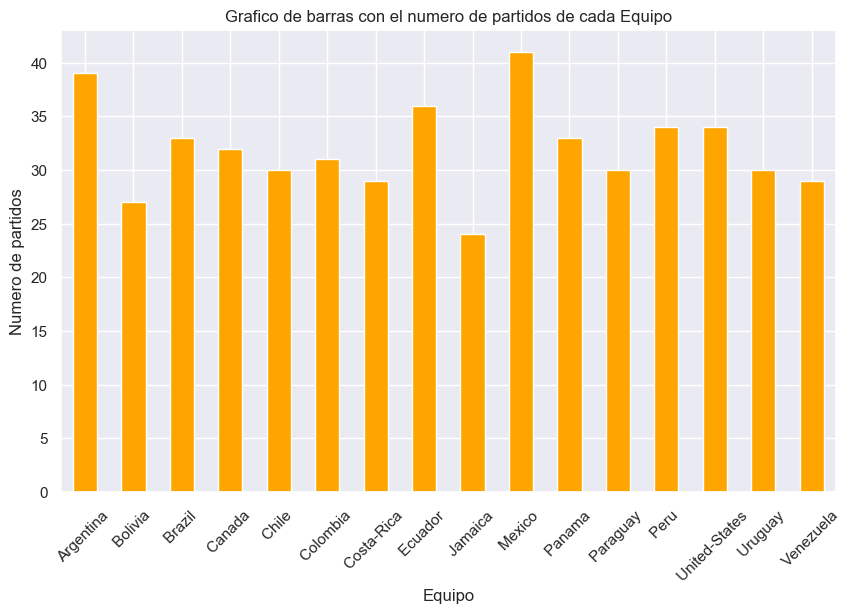

In [718]:
df1.groupby('team')['team'].count().plot(kind = 'bar', 
                                         rot=45,
                                         color="orange", 
                                         title= 'Grafico de barras con el numero de partidos de cada Equipo',
                                         figsize=(10,6),
                                         xlabel = 'Equipo',
                                         ylabel = 'Numero de partidos'
                                        )


**Hemos conseguido registros desde 23 a 40 para los distintos equipos que van a jugar la copa**

### Equipos que juegan la copa

In [719]:
df1['team'].unique()

array(['Argentina ', 'Canada ', 'Chile ', 'Peru ', 'Venezuela ',
       'Ecuador ', 'Mexico ', 'Uruguay ', 'Panama ', 'United-States ',
       'Bolivia ', 'Colombia ', 'Brazil ', 'Costa-Rica ', 'Paraguay ',
       'Jamaica '], dtype=object)

Tengo que eliminar los guiones de los nombres para que sean los mismos que en la columna de oponentes.

In [720]:
# Elimino espacios
df1['team'] = df1['team'].str.replace(' ', '')

In [721]:
df1['team'].unique()

array(['Argentina', 'Canada', 'Chile', 'Peru', 'Venezuela', 'Ecuador',
       'Mexico', 'Uruguay', 'Panama', 'United-States', 'Bolivia',
       'Colombia', 'Brazil', 'Costa-Rica', 'Paraguay', 'Jamaica'],
      dtype=object)

In [722]:
df1['team'] = df1['team'].str.replace('-', ' ')

In [723]:
df1['team'].unique()

array(['Argentina', 'Canada', 'Chile', 'Peru', 'Venezuela', 'Ecuador',
       'Mexico', 'Uruguay', 'Panama', 'United States', 'Bolivia',
       'Colombia', 'Brazil', 'Costa Rica', 'Paraguay', 'Jamaica'],
      dtype=object)

## Tipos de Variables
Vamos a pasar asegurarnos que las variables sean del tipo correcto

In [724]:
df1.dtypes

date               object
time               object
comp               object
round              object
day                object
venue              object
result             object
gf                  int32
ga                  int32
opponent           object
poss              float64
attendance        float64
captain            object
formation          object
referee            object
match_report       object
notes              object
sh                float64
sot               float64
dist              float64
pk                  int64
pkatt               int64
season              int64
team               object
opponent_short     object
dtype: object

**date** hay que cambiarlo a fomrmato fecha. 


In [725]:
df1['date']=pd.to_datetime(df1['date'])

### Exploracion Grafica

#### Cantidad de goles de un equipo
    - Para calcular la cantidad de goles que hace un equipo vamos a dividir el df en 2 partes, equipo local y visitante. Despues en el caso de equipo local vamos a pensar a los goles local como goles marcados y goles visitantes como goles recibidos. Con el equipo visitante sera lo contrario.

In [809]:
# Dividir el df en df_local y df_visitante
df_local = df1[['team', 'gf','ga']]
df_visitante = df1[['opponent', 'gf','ga']]


In [810]:
# Renombrar Columnas
df_local = df_local.rename(columns={'team' : 'Equipo', 
                         'gf' : 'GolesMarcados',
                         'ga' : 'GolesRecibidos'})

df_local.sort_values('Equipo')

,Equipo,GolesMarcados,GolesRecibidos
0,Argentina,3,0
46,Argentina,1,1
47,Argentina,2,0
48,Argentina,1,1
49,Argentina,2,2
...,...,...,...
165,Venezuela,1,0
166,Venezuela,0,1
167,Venezuela,4,0
146,Venezuela,0,3


In [811]:
df_visitante = df_visitante.rename(columns={'opponent' : 'Equipo', 
                         'gf' : 'GolesRecibidos',
                         'ga' : 'GolesMarcados'})
df_visitante.sort_values('Equipo')

,Equipo,GolesRecibidos,GolesMarcados
10,Albania,3,0
123,Argentina,0,2
332,Argentina,2,2
169,Argentina,0,1
162,Argentina,0,3
...,...,...,...
59,Venezuela,3,0
108,Venezuela,3,0
100,Venezuela,1,2
255,Venezuela,4,1


In [812]:
# Concatenar y agrupar y calcular la suma. Esa suma va a ser los goles convertidos y recibidos por cada equipo
df_goles = pd.concat([df_local,df_visitante], ignore_index= True).groupby(['Equipo']).sum()
df_goles.index

Index(['Albania', 'Argentina', 'Australia', 'Bahrain', 'Barbados', 'Belgium',
       'Bermuda', 'Bolivia', 'Brazil', 'Cameroon', 'Canada', 'Cape Verde',
       'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Curaçao',
       'Côte d'Ivoire', 'Dominica', 'Dominican Rep.', 'Ecuador', 'El Salvador',
       'England', 'Estonia', 'France', 'Germany', 'Ghana', 'Guadeloupe',
       'Guatemala', 'Guinea', 'Haiti', 'Honduras', 'IR Iran', 'Iceland',
       'Indonesia', 'Iraq', 'Italy', 'Jamaica', 'Japan', 'Korea Republic',
       'Malta', 'Martinique', 'Mexico', 'Morocco', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Nigeria', 'Oman', 'Panama', 'Paraguay',
       'Peru', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Saudi Arabia',
       'Senegal', 'Serbia', 'Slovakia', 'Spain', 'St. Kitts & Nevis',
       'Suriname', 'Sweden', 'Switzerland', 'Trin & Tobago', 'Tunisia', 'UAE',
       'United States', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Wales'],
      dtype='object', name='Equipo')

In [813]:
# Concatenar y agrupar y calcular la media. Esa media va a ser la cantidad de goles esperado por partido
df_goles_media = pd.concat([df_local,df_visitante], ignore_index= True).groupby('Equipo').mean()
df_goles_media

,GolesMarcados,GolesRecibidos
Equipo,,
Albania,0.000000,3.000000
Argentina,2.032787,0.475410
Australia,1.166667,1.500000
Bahrain,1.000000,2.000000
Barbados,0.000000,1.000000
...,...,...
United States,1.460000,0.920000
Uruguay,1.450980,1.019608
Uzbekistan,1.200000,1.800000


In [814]:
# Me quedo con los equipos presentes en la copa
equipos_copa = [
    'Peru', 'Chile', 'Canada', 'Argentina',
    'Mexico', 'Ecuador', 'Jamaica', 'Venezuela', 
    'Colombia', 'Paraguay', 'Costa Rica','Brazil', 
    'United States' ,'Uruguay','Bolivia', 'Panama'
]



In [815]:
# Filtro solo los equipos de la copa america 2024
df_goles2 = df_goles[df_goles.index.isin(equipos_copa)]
df_goles2

,GolesMarcados,GolesRecibidos
Equipo,,
Argentina,124,29
Bolivia,57,103
Brazil,116,31
Canada,70,44
Chile,65,66
Colombia,78,44
Costa Rica,47,53
Ecuador,75,54
Jamaica,33,66


##### Grafico Univariado

In [816]:
# Elegimos una paleta que de un contrate
palette = sns.color_palette("Set1", len(df_goles2))

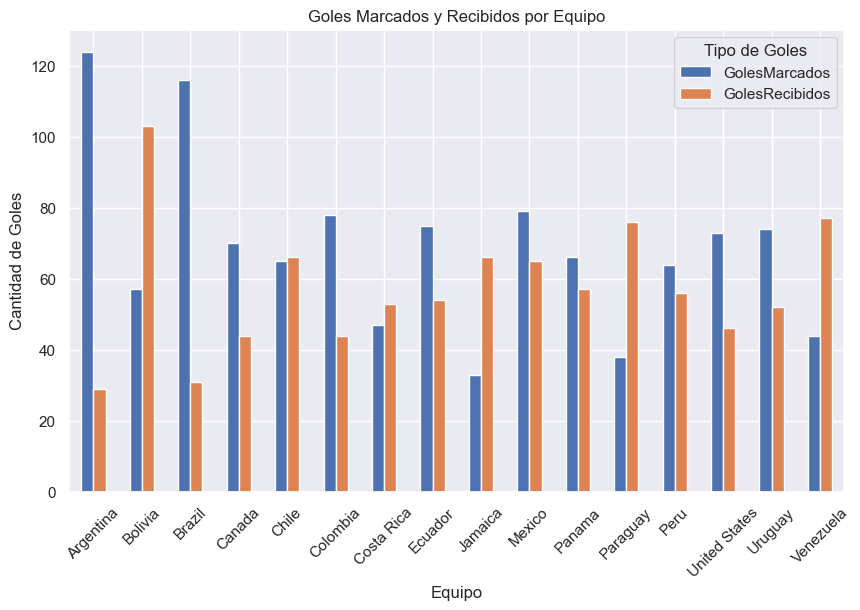

In [817]:
# Crear un gráfico de barras
df_goles2.plot(kind='bar', figsize=(10, 6))
plt.title('Goles Marcados y Recibidos por Equipo')
plt.xlabel('Equipo')
plt.ylabel('Cantidad de Goles')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Goles')
plt.show()

Se puede observar tres grupos de equipos. Aquellos con mas goles marcados que recibidos (Argentina y Brasil), aquellos parejos y los que reciben mas de lo que convierten (Jamaica, Bolivia y Venezuela)

##### Grafico Bivariado

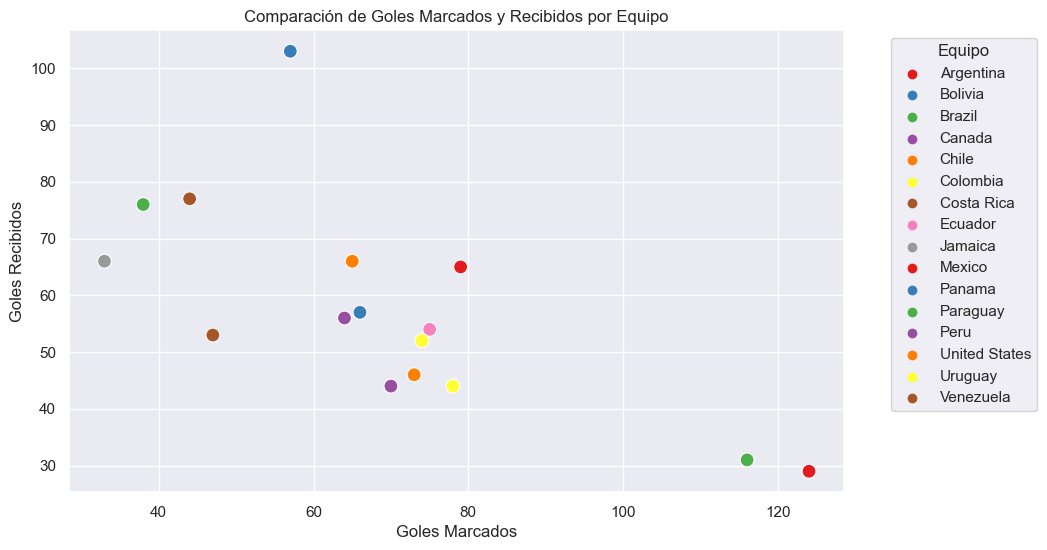

In [820]:
# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_goles2, x='GolesMarcados', y='GolesRecibidos', hue='Equipo', s=100, palette=palette)

# Añadir títulos y etiquetas
plt.title('Comparación de Goles Marcados y Recibidos por Equipo')
plt.xlabel('Goles Marcados')
plt.ylabel('Goles Recibidos')


plt.legend(title='Equipo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Se observa con mas claridad los tres grupos que se menciono antes.

#### Ahora realizo lo mismo pero con los promedios.
> Para no estar tan sezgado por el numero de partidos que pude conseguir.

In [821]:
# Filtro solo los equipos de la copa america 2024
df_media = df_goles_media[df_goles_media.index.isin(equipos_copa)]
df_media

,GolesMarcados,GolesRecibidos
Equipo,,
Argentina,2.032787,0.475410
Bolivia,1.117647,2.019608
Brazil,2.274510,0.607843
Canada,1.590909,1.000000
Chile,1.274510,1.294118
Colombia,1.471698,0.830189
Costa Rica,1.068182,1.204545
Ecuador,1.271186,0.915254
Jamaica,0.868421,1.736842


##### Univariado

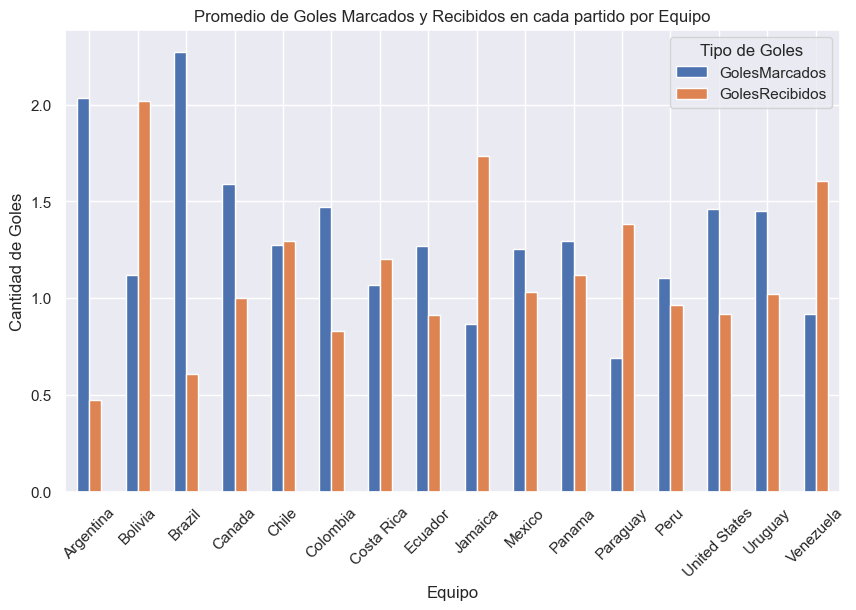

In [822]:
# Crear un gráfico de barras
df_media.plot(kind='bar', figsize=(10, 6))
plt.title('Promedio de Goles Marcados y Recibidos en cada partido por Equipo')
plt.xlabel('Equipo')
plt.ylabel('Cantidad de Goles')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Goles')
plt.show()

Argentina y Brasil marcan por lo menos 2 goles por partido y tienen probabilidad de recibir menos de uno.
Bolivia, Jamaica y Venezuela son los equipos mas propensos a recibir goles en contra

##### Grafico Bivariado

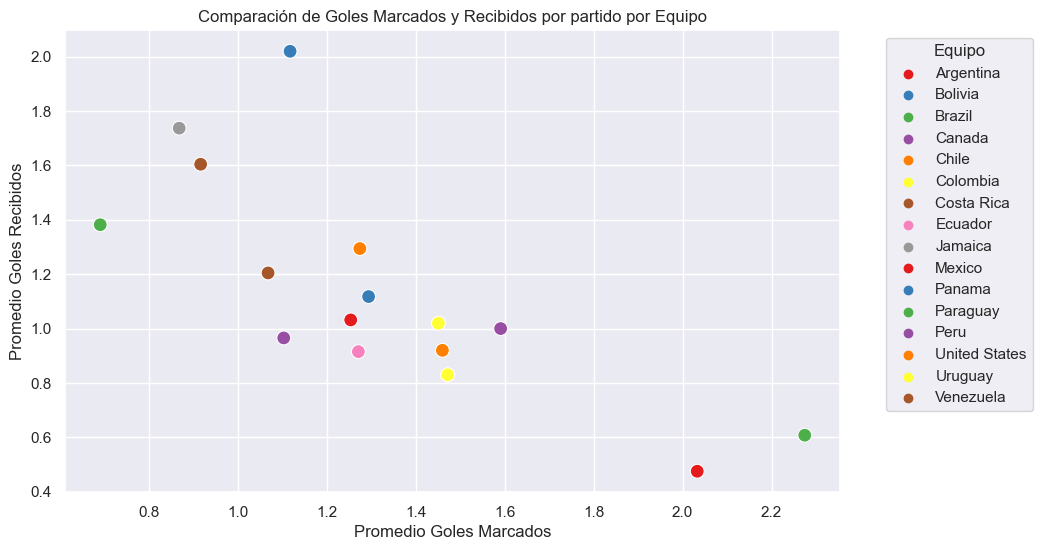

In [823]:
# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_media, x='GolesMarcados', y='GolesRecibidos', hue='Equipo', s=100, palette=palette)

# Añadir títulos y etiquetas
plt.title('Comparación de Goles Marcados y Recibidos por partido por Equipo')
plt.xlabel('Promedio Goles Marcados')
plt.ylabel('Promedio Goles Recibidos')


plt.legend(title='Equipo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

## Preprocesmiento de variables

In [824]:
df1.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,notes,sh,sot,dist,pk,pkatt,season,team,opponent_short,res
0,2024-03-22,20:00,Friendlies (M),Friendlies (M),Fri,Neutral,W,3,0,El Salvador,...,NaN,13.541667,5.416667,NaN,0,0,2024,Argentina,sv,2
1,2024-03-26,19:50,Friendlies (M),Friendlies (M),Tue,Neutral,W,3,1,Costa Rica,...,NaN,13.541667,5.416667,NaN,0,0,2024,Argentina,cr,2
2,2024-06-09,18:00,Friendlies (M),Friendlies (M),Sun,Neutral,W,1,0,Ecuador,...,NaN,13.541667,5.416667,NaN,0,0,2024,Argentina,ec,2
3,2024-06-14,20:00,Friendlies (M),Friendlies (M),Fri,Neutral,W,4,1,Guatemala,...,NaN,13.541667,5.416667,NaN,1,1,2024,Argentina,gt,2
4,2024-03-22,20:00,Friendlies (M),Friendlies (M),Fri,Neutral,W,3,0,El Salvador,...,NaN,13.541667,5.416667,NaN,0,0,2024,Argentina,sv,2


In [825]:
# Defino X con las variables que quiero incluir en el modelo
X = df1[['gf', 'ga','sh', 'sot','poss','pk', 'pkatt','opponent','team']]


In [826]:
# Venue la saco porque es siempre nuetral

In [827]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Definir las columnas numéricas y categóricas
numeric_features = ['gf', 'ga','sh', 'sot','poss','pk', 'pkatt']
categorical_features = ['opponent', 'team']

# Crear el ColumnTransformer
Preprocesamiento = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), numeric_features),
        ('one_hot_encoder', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'  # Mantener las demás columnas tal como están, si existen
)




In [828]:
# Aplicar la transformación
X_dummies=Preprocesamiento.fit_transform(X)
X_dummies.toarray().shape

(512, 97)

## Objetivo
- Tenemos que fijar un objetivo. **El objetivo va a ser si el equipo gana, empata o pierde.**
- Para eso creo una columna de codificada donde si gano (W) va a ser 2, encambio si el equipo empato 0 o perdio un 1. 


In [829]:
# con tres predicciones
df1['res'] = df1['result'].astype('category').cat.codes

In [830]:
# Entonces W = 2, L=1, D=0
df1[['result','res']].head(10)
y = df1['res']

In [831]:
df1[['result','res']]

,result,res
0,W,2
1,W,2
2,W,2
3,W,2
4,W,2
...,...,...
507,L,1
508,W,2
509,L,1
510,L,1


## Model selection

In [832]:
from sklearn.ensemble import RandomForestRegressor as RF
from xgboost import XGBRegressor as XG
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import train_test_split


In [833]:
# split
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y)


In [834]:
# instancio  modelos

rf = RF()
xg = XG()


In [835]:
cross_val_score(rf, X_train, y_train, cv=5).mean()

0.9675666578138131

In [836]:
cross_val_score(xg, X_train, y_train, cv=3).mean()

0.9985204339027405

In [841]:
# lista de diccionarios, un diccionario de posibles hyperparametros para cada modelo
params_grid = [

               {'estimator':[rf],
                'estimator__n_estimators': [ 50, 100, 500],
                'estimator__max_features': ['sqrt','log2', None],
                'estimator__max_depth': [5,10, 50, None]

                },
    
            
               {
                'estimator': [xg],
                'estimator__n_estimators': [ 50, 100, 500],
                'estimator__eta': [0.01, 0.05, 0.1, 0.3],
                'estimator__max_depth': [3,6,10]

                },
    
    
                {
                'estimator':[KNeighborsClassifier()],
                'estimator__n_neighbors': [ 3, 5, 7 ],

                },
    

               {
                'estimator': [DecisionTreeClassifier()],
                'estimator__max_leaf_nodes': [ 5, 10, 15, 20]
                }, 
    
            
    
               {
                'estimator': [RandomForestClassifier()],
                'estimator__n_estimators': [ 200, 300, 500],
                'estimator__max_depth': [5, 7, 9]

                }




              ]

In [842]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


# tenemos que usar un pipeline para que GSCV haga la busqueda, armamos un pipepline con un solo paso, con un modelo solo

model = Pipeline(steps=[ ('estimator', RF())])


In [843]:
grid_search = GridSearchCV(model, params_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('estimator', RandomForestRegressor())]),
             param_grid=[{'estimator': [RandomForestRegressor()],
                          'estimator__max_depth': [5, 10, 50, None],
                          'estimator__max_features': ['sqrt', 'log2', None],
                          'estimator__n_estimators': [50, 100, 500]},
                         {'estimator': [XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=N...
                          'estimator__eta': [0.01, 0.05, 0.1, 0.3],
                          'estimator__max_depth': [3, 6, 10],
                          'estimator__n_estimators': [50, 100, 500]},
                         {'estimator': [KNeighborsClassifier()],
                          'estimator__n_neighbors': [3, 5, 7]},
                         {'estimator': [DecisionTreeClassifier()],
                          'estimator__max_leaf_nodes': [5, 10, 15, 20]},
                         {'estimator': [RandomForestClassifier()],
                          'estimator__max_depth': [5, 7, 9],
                          'estimator__n_estimators': [200, 300, 500]}])

In [844]:
#miramos los resultados
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_estimator__max_depth,param_estimator__max_features,param_estimator__n_estimators,param_estimator__eta,param_estimator__n_neighbors,param_estimator__max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
76,0.002234,0.000391,0.000804,0.000402,DecisionTreeClassifier(),NaN,NaN,NaN,NaN,NaN,10.0,"{'estimator': DecisionTreeClassifier(), 'estim...",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
41,0.256697,0.020894,0.002699,0.000415,"XGBRegressor(base_score=None, booster=None, ca...",6.0,NaN,500.0,0.01,NaN,NaN,"{'estimator': XGBRegressor(base_score=None, bo...",0.998829,0.999927,0.999692,0.998520,0.999933,0.999380,0.000591,2
44,0.265263,0.038135,0.002749,0.000552,"XGBRegressor(base_score=None, booster=None, ca...",10.0,NaN,500.0,0.01,NaN,NaN,"{'estimator': XGBRegressor(base_score=None, bo...",0.998829,0.999925,0.999692,0.998520,0.999933,0.999380,0.000591,3
50,0.151894,0.012029,0.002828,0.000417,"XGBRegressor(base_score=None, booster=None, ca...",6.0,NaN,500.0,0.05,NaN,NaN,"{'estimator': XGBRegressor(base_score=None, bo...",0.998794,0.999975,0.999640,0.998487,1.000000,0.999379,0.000624,4
49,0.057200,0.004054,0.002204,0.000398,"XGBRegressor(base_score=None, booster=None, ca...",6.0,NaN,100.0,0.05,NaN,NaN,"{'estimator': XGBRegressor(base_score=None, bo...",0.998810,0.999936,0.999669,0.998506,0.999944,0.999373,0.000600,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.042793,0.002463,0.003474,0.000429,RandomForestRegressor(),5.0,sqrt,50.0,NaN,NaN,NaN,"{'estimator': RandomForestRegressor(), 'estima...",0.270444,0.241680,0.289865,0.236015,0.256470,0.258895,0.019587,84
1,0.085703,0.003138,0.006468,0.000604,RandomForestRegressor(),5.0,sqrt,100.0,NaN,NaN,NaN,"{'estimator': RandomForestRegressor(), 'estima...",0.249703,0.285609,0.315934,0.188512,0.233621,0.254676,0.043715,85
5,0.418966,0.009107,0.037275,0.014580,RandomForestRegressor(),5.0,log2,500.0,NaN,NaN,NaN,"{'estimator': RandomForestRegressor(), 'estima...",0.198824,0.230007,0.226163,0.134360,0.160857,0.190042,0.037233,86
3,0.049543,0.005473,0.003760,0.000380,RandomForestRegressor(),5.0,log2,50.0,NaN,NaN,NaN,"{'estimator': RandomForestRegressor(), 'estima...",0.200568,0.215250,0.251455,0.104459,0.157330,0.185812,0.050641,87


In [845]:
#mejores parametros
print(grid_search.best_params_)

{'estimator': DecisionTreeClassifier(), 'estimator__max_leaf_nodes': 10}


In [846]:
#mejor modelo
grid_search.best_estimator_

Pipeline(steps=[('estimator', DecisionTreeClassifier(max_leaf_nodes=10))])

In [847]:
modelo_final=grid_search.best_estimator_

El mejor modelo es un arbol de decision 

# Validacion Final

In [848]:
modelo_final.fit(X_train,y_train)

Pipeline(steps=[('estimator', DecisionTreeClassifier(max_leaf_nodes=10))])

In [849]:
y_pred=modelo_final.predict(X_test)

In [850]:
r2(y_test,y_pred)

0.9034690799396682

# Como podemos procesar nuevas predicciones?

Los nuevos datos tienen que poder ser alimentados al metodo `.predict()`

Tienen que tener la misma estructura que `X_test`

In [851]:
X_test.shape

(128, 97)

In [852]:
#df1[['team', 'team_code']].value_counts().sort_values()

In [853]:
df_fixture = pd.read_csv('https://raw.githubusercontent.com/Havilongo/Proyecto-CoderHouse/main/copa_america2024_fixture_limpio.csv')
df_fixture

,home,score,away,Year
0,Argentina,Match 1,Canada,2024
1,Peru,Match 2,Chile,2024
2,Peru,Match 10,Canada,2024
3,Chile,Match 9,Argentina,2024
4,Argentina,Match 17,Peru,2024
5,Canada,Match 18,Chile,2024
6,Ecuador,Match 4,Venezuela,2024
7,Mexico,Match 3,Jamaica,2024
8,Ecuador,Match 12,Jamaica,2024
9,Venezuela,Match 11,Mexico,2024


In [854]:
fixture = pd.DataFrame()

In [855]:
fixture['team'], fixture['opponent'] = df_fixture['home'],df_fixture['away']


In [856]:
fixture

,team,opponent
0,Argentina,Canada
1,Peru,Chile
2,Peru,Canada
3,Chile,Argentina
4,Argentina,Peru
5,Canada,Chile
6,Ecuador,Venezuela
7,Mexico,Jamaica
8,Ecuador,Jamaica
9,Venezuela,Mexico


### Divido el fixture en las distintas fases de la copa

In [857]:
df_primera_fase = fixture[:24].copy()
df_cuartos_final = fixture[24:28].copy()
df_semi_final = fixture[28:30].copy()
df_tercer_puesto = fixture[30:31].copy()
df_final = fixture[31:].copy()

In [858]:
df_primera_fase

,team,opponent
0,Argentina,Canada
1,Peru,Chile
2,Peru,Canada
3,Chile,Argentina
4,Argentina,Peru
5,Canada,Chile
6,Ecuador,Venezuela
7,Mexico,Jamaica
8,Ecuador,Jamaica
9,Venezuela,Mexico


In [859]:
df2_mean = df1.groupby('team')[['poss', 'gf', 'ga', 'pk', 'sh', 'pkatt', 'sot']].mean().reset_index()
df2_mean

,team,poss,gf,ga,pk,sh,pkatt,sot
0,Argentina,58.791667,2.205128,0.512821,0.256410,13.541667,0.282051,5.416667
1,Bolivia,42.983539,1.185185,1.888889,0.111111,11.814815,0.148148,3.995885
2,Brazil,59.090909,2.333333,0.696970,0.393939,15.181818,0.393939,6.636364
3,Canada,51.857143,1.656250,1.062500,0.156250,11.285714,0.218750,3.285714
4,Chile,53.944444,1.333333,1.266667,0.066667,11.777778,0.100000,3.444444
5,Colombia,53.365591,1.612903,0.741935,0.161290,12.351254,0.161290,3.949821
6,Costa Rica,42.201970,1.241379,1.206897,0.068966,7.684729,0.103448,3.251232
7,Ecuador,51.857143,1.305556,0.888889,0.194444,11.095238,0.277778,3.857143
8,Jamaica,48.200000,1.083333,1.541667,0.125000,12.600000,0.166667,4.200000
9,Mexico,57.222222,1.414634,0.975610,0.219512,18.333333,0.243902,6.333333


In [860]:
df_test = df_primera_fase.merge(df2_mean, on='team', how='left')

In [861]:
df_test

,team,opponent,poss,gf,ga,pk,sh,pkatt,sot
0,Argentina,Canada,58.791667,2.205128,0.512821,0.256410,13.541667,0.282051,5.416667
1,Peru,Chile,45.277778,1.147059,0.941176,0.088235,9.888889,0.147059,3.722222
2,Peru,Canada,45.277778,1.147059,0.941176,0.088235,9.888889,0.147059,3.722222
3,Chile,Argentina,53.944444,1.333333,1.266667,0.066667,11.777778,0.100000,3.444444
4,Argentina,Peru,58.791667,2.205128,0.512821,0.256410,13.541667,0.282051,5.416667
5,Canada,Chile,51.857143,1.656250,1.062500,0.156250,11.285714,0.218750,3.285714
6,Ecuador,Venezuela,51.857143,1.305556,0.888889,0.194444,11.095238,0.277778,3.857143
7,Mexico,Jamaica,57.222222,1.414634,0.975610,0.219512,18.333333,0.243902,6.333333
8,Ecuador,Jamaica,51.857143,1.305556,0.888889,0.194444,11.095238,0.277778,3.857143
9,Venezuela,Mexico,42.833333,0.965517,1.413793,0.068966,11.333333,0.172414,3.500000


In [862]:
df_test_dummies=Preprocesamiento.transform(df_test)

In [863]:
modelo_final.predict(df_test_dummies)

array([2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 1, 2, 2, 2, 0,
       2, 0], dtype=int8)

In [864]:
import numpy as np

df_test['result'] =  np.round(modelo_final.predict(df_test_dummies),1)

In [865]:
df_test

,team,opponent,poss,gf,ga,pk,sh,pkatt,sot,result
0,Argentina,Canada,58.791667,2.205128,0.512821,0.256410,13.541667,0.282051,5.416667,2
1,Peru,Chile,45.277778,1.147059,0.941176,0.088235,9.888889,0.147059,3.722222,0
2,Peru,Canada,45.277778,1.147059,0.941176,0.088235,9.888889,0.147059,3.722222,0
3,Chile,Argentina,53.944444,1.333333,1.266667,0.066667,11.777778,0.100000,3.444444,0
4,Argentina,Peru,58.791667,2.205128,0.512821,0.256410,13.541667,0.282051,5.416667,2
5,Canada,Chile,51.857143,1.656250,1.062500,0.156250,11.285714,0.218750,3.285714,2
6,Ecuador,Venezuela,51.857143,1.305556,0.888889,0.194444,11.095238,0.277778,3.857143,0
7,Mexico,Jamaica,57.222222,1.414634,0.975610,0.219512,18.333333,0.243902,6.333333,0
8,Ecuador,Jamaica,51.857143,1.305556,0.888889,0.194444,11.095238,0.277778,3.857143,0
9,Venezuela,Mexico,42.833333,0.965517,1.413793,0.068966,11.333333,0.172414,3.500000,0


In [866]:
# Obtener nombres únicos de team y opponent
puntos_equipos = pd.unique(df_test[['team', 'opponent']].values.ravel())
puntos_equipos

array(['Argentina', 'Canada', 'Peru', 'Chile', 'Ecuador', 'Venezuela',
       'Mexico', 'Jamaica', 'United States', 'Bolivia', 'Uruguay',
       'Panama', 'Colombia', 'Paraguay', 'Brazil', 'Costa Rica'],
      dtype=object)

In [867]:
# Crear un DataFrame vacío con los nombres únicos
points_df = pd.DataFrame(puntos_equipos, columns=['team'])
points_df['puntos'] = 0
print("\nDataFrame vacío con equipos únicos:")
print(points_df)


DataFrame vacío con equipos únicos:
             team  puntos
0       Argentina       0
1          Canada       0
2            Peru       0
3           Chile       0
4         Ecuador       0
5       Venezuela       0
6          Mexico       0
7         Jamaica       0
8   United States       0
9         Bolivia       0
10        Uruguay       0
11         Panama       0
12       Colombia       0
13       Paraguay       0
14         Brazil       0
15     Costa Rica       0


In [868]:
# Definir una función para asignar puntos
def asignar_puntos(row):
    if row['result'] == 2.0:
        return pd.Series([3, 0], index=['puntos_team', 'puntos_opponent'])
    elif row['result'] == 0.0:
        return pd.Series([1, 1], index=['puntos_team', 'puntos_opponent'])
    elif row['result'] == 1.0:
        return pd.Series([0, 3], index=['puntos_team', 'puntos_opponent'])


In [869]:
# Aplicar la función para crear las nuevas columnas 'puntos_team' y 'puntos_opponent'
df_test[['puntos_team', 'puntos_opponent']] = df_test.apply(asignar_puntos, axis=1)
df_test

,team,opponent,poss,gf,ga,pk,sh,pkatt,sot,result,puntos_team,puntos_opponent
0,Argentina,Canada,58.791667,2.205128,0.512821,0.256410,13.541667,0.282051,5.416667,2,3,0
1,Peru,Chile,45.277778,1.147059,0.941176,0.088235,9.888889,0.147059,3.722222,0,1,1
2,Peru,Canada,45.277778,1.147059,0.941176,0.088235,9.888889,0.147059,3.722222,0,1,1
3,Chile,Argentina,53.944444,1.333333,1.266667,0.066667,11.777778,0.100000,3.444444,0,1,1
4,Argentina,Peru,58.791667,2.205128,0.512821,0.256410,13.541667,0.282051,5.416667,2,3,0
5,Canada,Chile,51.857143,1.656250,1.062500,0.156250,11.285714,0.218750,3.285714,2,3,0
6,Ecuador,Venezuela,51.857143,1.305556,0.888889,0.194444,11.095238,0.277778,3.857143,0,1,1
7,Mexico,Jamaica,57.222222,1.414634,0.975610,0.219512,18.333333,0.243902,6.333333,0,1,1
8,Ecuador,Jamaica,51.857143,1.305556,0.888889,0.194444,11.095238,0.277778,3.857143,0,1,1
9,Venezuela,Mexico,42.833333,0.965517,1.413793,0.068966,11.333333,0.172414,3.500000,0,1,1


In [870]:
# Acumular los puntos en el DataFrame points_df
for index, row in df_test.iterrows():
    points_df.loc[points_df['team'] == row['team'], 'puntos'] += row['puntos_team']
    points_df.loc[points_df['team'] == row['opponent'], 'puntos'] += row['puntos_opponent']

print("\nDataFrame con puntos acumulados:")
print(points_df)


DataFrame con puntos acumulados:
             team  puntos
0       Argentina       7
1          Canada       4
2            Peru       2
3           Chile       2
4         Ecuador       3
5       Venezuela       5
6          Mexico       3
7         Jamaica       2
8   United States       7
9         Bolivia       1
10        Uruguay       2
11         Panama       5
12       Colombia       6
13       Paraguay       2
14         Brazil       7
15     Costa Rica       1


**Resultado:** 
- Grupo A: Ganador Argentina; Segundo Canada
- Grupo B: Ganador Venezuela; Segundo Ecuador
- Grupo C: Ganador Estados Unidos; Segundo Panama
- Grupo D: Ganador Brasil; Segundo Colombia

## Ahora vamos a simular los cuartos de final

In [871]:
df_cuartos_final

,team,opponent
24,Winner Group A,Runner-up Group B
25,Winner Group B,Runner-up Group A
26,Winner Group C,Runner-up Group D
27,Winner Group D,Runner-up Group C


Tengo que reemplazar los equipos en el dataframe

In [872]:
# Diccionario de reemplazos
replacements = {
    'Winner Group A': 'Argentina',
    'Winner Group B': 'Venezuela',
    'Winner Group C': 'United States',
    'Winner Group D': 'Brazil',
    'Runner-up Group A': 'Canada',
    'Runner-up Group B': 'Ecuador',
    'Runner-up Group C': 'Panama',
    'Runner-up Group D': 'Colombia'
}

In [873]:
df_cuartos_final.replace(replacements, inplace=True)


In [874]:
df_cuartos_final

,team,opponent
24,Argentina,Ecuador
25,Venezuela,Canada
26,United States,Colombia
27,Brazil,Panama


Ahora lo uno con los datos de los equipos para hacer la prediccion 

In [875]:
df_test2 = df_cuartos_final.merge(df2_mean, on='team', how='left')
df_test2

,team,opponent,poss,gf,ga,pk,sh,pkatt,sot
0,Argentina,Ecuador,58.791667,2.205128,0.512821,0.256410,13.541667,0.282051,5.416667
1,Venezuela,Canada,42.833333,0.965517,1.413793,0.068966,11.333333,0.172414,3.500000
2,United States,Colombia,58.222222,1.705882,0.794118,0.176471,16.666667,0.176471,5.666667
3,Brazil,Panama,59.090909,2.333333,0.696970,0.393939,15.181818,0.393939,6.636364


In [876]:
df_test2_dummies=Preprocesamiento.transform(df_test2)

In [877]:
modelo_final.predict(df_test2_dummies)

array([2, 0, 2, 2], dtype=int8)

In [878]:
df_cuartos_final['result'] =  np.round(modelo_final.predict(df_test2_dummies),1)
df_cuartos_final

,team,opponent,result
24,Argentina,Ecuador,2
25,Venezuela,Canada,0
26,United States,Colombia,2
27,Brazil,Panama,2


**Resultados**
- Pasa Argetina, Canada y Venezuela empataron, United States y Brazil

## Semifinal

In [879]:
df_semi_final

,team,opponent
28,Winner Match 25,Winner Match 26
29,Winner Match 27,Winner Match 28


Tengo que reemplazar los equipos en el dataframe

In [880]:
# Diccionario de reemplazos
replacements = {
    'Winner Match 25': 'Argentina',
    'Winner Match 26': 'Canada',
    'Winner Match 27': 'United States',
    'Winner Match 28': 'Brazil'
}

In [881]:
df_semi_final.replace(replacements, inplace=True)
df_semi_final

,team,opponent
28,Argentina,Canada
29,United States,Brazil


Ahora lo uno con los datos de los equipos para hacer la prediccion 

In [882]:
df_test3 = df_semi_final.merge(df2_mean, on='team', how='left')
df_test3

,team,opponent,poss,gf,ga,pk,sh,pkatt,sot
0,Argentina,Canada,58.791667,2.205128,0.512821,0.256410,13.541667,0.282051,5.416667
1,United States,Brazil,58.222222,1.705882,0.794118,0.176471,16.666667,0.176471,5.666667


In [883]:
df_test3_dummies=Preprocesamiento.transform(df_test3)

In [884]:
modelo_final.predict(df_test3_dummies)

array([2, 2], dtype=int8)

In [885]:
df_semi_final['result'] =  np.round(modelo_final.predict(df_test3_dummies),1)
df_semi_final

,team,opponent,result
28,Argentina,Canada,2
29,United States,Brazil,2


**Resultado:**
 - Paso Argentina y United States

## Final

In [886]:
df_final

,team,opponent
31,Winner Match 29,Winner Match 30


Tengo que reemplazar los equipos en el dataframe

In [887]:
# Diccionario de reemplazos
replacements = {
    'Winner Match 29': 'Argentina',
    'Winner Match 30': 'United States'
}

In [888]:
df_final.replace(replacements, inplace=True)
df_final

,team,opponent
31,Argentina,United States


Ahora lo uno con los datos de los equipos para hacer la prediccion 

In [889]:
df_test4 = df_final.merge(df2_mean, on='team', how='left')
df_test4

,team,opponent,poss,gf,ga,pk,sh,pkatt,sot
0,Argentina,United States,58.791667,2.205128,0.512821,0.25641,13.541667,0.282051,5.416667


In [890]:
df_test4_dummies=Preprocesamiento.transform(df_test4)

In [891]:
modelo_final.predict(df_test4_dummies)

array([2], dtype=int8)

In [892]:
df_final['result'] =  np.round(modelo_final.predict(df_test4_dummies),1)
df_final

,team,opponent,result
31,Argentina,United States,2


**Resultado**
- Argentina gana la Copa America 2024

# Conclusion
 - El modelo que mejor ajusto fue un Arbol de Decision.
 - El modelo se puede mejorar generando un conjunto de valores para cada equipo y que esa informacion vaya incorporada cuando simule los partidos. Me parece que en esta simulacion que hice estaba muy sesgada hacia el equipo que aparece como 'team'.
 - Incluir alguna media de los jugadores que juegan 

#### Analisis de Jugadores de la Copa america
> https://github.com/Havilongo/Proyecto-CoderHouse/blob/main/data_Jugadores.ipynb